# Features engineering and models selection - Features selection 

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Features univariate selection

We are going to use the features univariate selection above the `winequality-white.csv` file.

In [2]:
import pandas as pd

In [3]:
# Read file
data = pd.read_csv('data/winequality-white.csv', sep = ';')

# Remove the quality feature:
target = 'quality'
features = list(data.columns)
features.remove(target)

features = data[features]
target = data[target]

#### Remove variables with low variance

This allows remove the variables which have a low variance. For that, we use `VarianceThreshold` given by `scikit-learn`

In [4]:
from sklearn.feature_selection import VarianceThreshold

In [5]:
# Create the VarianceThreshold object
var_th = VarianceThreshold(threshold = 0.6)

# Transform the features
features_var = var_th.fit_transform(features)

# Print the results:
print('Original features:', features.shape[1])
print('Final features:', features_var.shape[1])

print('List of final features:', np.asarray(list(features))[var_th.get_support()])

Original features: 11
Final features: 5
List of final features: ['fixed acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']


#### K-best selection 

This allows select the k-best features which get a better results with a function. For that, we use `SelectKBest` given by `scikit-learn`. The functions used are: `f_regression` for linear regression models and `chi2` for classification models.

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [7]:
# Create a f_regression SelectKBest
var_sk = SelectKBest(f_regression, k = 5) # the 5 best features
features_sk = var_sk.fit_transform(features, target)

# Print the results:
print('Using f_regression:')
print('  Final variables:', features_sk.shape[1])
print('  List of final variables:', np.asarray(list(features))[var_sk.get_support()])

Using f_regression:
  Final variables: 5
  List of final variables: ['volatile acidity' 'chlorides' 'total sulfur dioxide' 'density' 'alcohol']


In [8]:
# Create a f_regression SelectKBest
var_sk = SelectKBest(chi2, k = 5) # the 5 best features
features_sk = var_sk.fit_transform(features, target)

# Print the results:
print('Using chi2:')
print('  Final variables:', features_sk.shape[1])
print('  List of final variables:', np.asarray(list(features))[var_sk.get_support()])


Using chi2:
  Final variables: 5
  List of final variables: ['volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']


One alternative to `SelectKBest` is `SelectPercentile`, where a percentage of features is selected:

In [9]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

In [10]:
# Create a f_regression SelectPercentile
var_sk = SelectPercentile(f_regression, percentile = 50) # the 50% best features
features_sk = var_sk.fit_transform(features, target)

# Print the results:
print('Using f_regression:')
print('  Final variables:', features_sk.shape[1])
print('  List of final variables:', np.asarray(list(features))[var_sk.get_support()])

Using f_regression:
  Final variables: 5
  List of final variables: ['volatile acidity' 'chlorides' 'total sulfur dioxide' 'density' 'alcohol']


In [11]:
# Create a f_regression SelectPercentile
var_sk = SelectPercentile(chi2, percentile = 50) # the 50% best features
features_sk = var_sk.fit_transform(features, target)

# Print the results:
print('Using chi2:')
print('  Final variables:', features_sk.shape[1])
print('  List of final variables:', np.asarray(list(features))[var_sk.get_support()])


Using chi2:
  Final variables: 5
  List of final variables: ['volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']


### IV - Information Value

The IV measures the classification capacity of the different independient variables in classification problems. As guiding approach, for selecting the variables we can use the following IV values:

| IV value | Classification capacity |
|----------|-------------------------|
|  <0.02   | Very soft |
| 0.02 to 0.1 | Soft |
| 0.1 to 0.3 | Average |
| 0.3 to 0.5 | Hard |
| >0.5 | Very Hard |

For use the IV is needed to have a categorical features. We are going to use the `credit-approval.csv` file for use the IV.

In [12]:
import pandas as pd

In [13]:
# Load data and remove null values
data = pd.read_csv('data/credit-approval.csv', sep = ',')
data.head()
mask = data.applymap(lambda x : x in ['?'])
data = data[-mask.any(axis=1)]

# Separate the variables
categoricals = ['V1', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13']
numerics     = ['V2', 'V3', 'V8', 'V14', 'V15']
target       = data['V16'] == '+'

In [14]:
def getIV(data, categoricals, target) :
    
    result_IV = []

    # For each categorical variable
    for v_cat in categoricals :

        # Get target, categorical values and categorical levels
        var_target = array(target)
        var_values = array(data[v_cat])
        var_levels = unique(var_values)

        # Get the values matrix of the categorical variable
        mat_values = np.zeros(shape=(len(var_levels), 2))

        for i in range(len(var_target)) :
            # Get the position of each level
            pos = 0
            while ((pos < len(var_levels)) and (var_levels[pos] != var_values[i])) : 
                pos += 1

            # Estimation of the number of values in each level
            if var_target[i] :
                mat_values[pos][0] += 1
            else :
                mat_values[pos][1] += 1

            # Get the IV value
            IV = 0
            for j in range(len(var_levels)) :
                if mat_values[j][0] > 0 and mat_values[j][1] > 0 :
                    rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                    rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])

                    IV += (rt - rf) * np.log(rt / rf)

        # Append the IV value
        result_IV.append(IV)
    
    # Return result
    return result_IV

In [15]:
# Print the IV value
IV = getIV(data, categoricals, target)

for i in range(len(categoricals)) :
    print('The', categoricals[i], 'feature has an IV:', IV[i])

The V1 feature has an IV: 0.0310557839282
The V4 feature has an IV: 0.353312725336
The V5 feature has an IV: 0.353312725336
The V6 feature has an IV: 5.30149147134
The V7 feature has an IV: 2.34839349885
The V9 feature has an IV: 3.24769074169
The V10 feature has an IV: 0.895478013341
The V11 feature has an IV: 11.0569990916
The V12 feature has an IV: 0.0423925791404
The V13 feature has an IV: 0.411470398153


With these results, we can say that the `V6`, `V7`, `V9` and `V11` features have a very hard classification capacity, while the `V4`, `V5` and `V13` have a hard.

### VIF - Variance Inflation Factor

The multicollinearity in a independient features set impacts negatively to the models built with them. A solution of this problem is use the VIF which allows cuantify the intensity of multicollinearity. The VIF value increases according to the multicollinearity increases. The VIF values bigger than 5 are considered high and VIF values bigger than 10 are considered very high.

The VIF value calculation can be implement like this:

In [16]:
def calculateVIF(data) :
    from sklearn.linear_model import LinearRegression
    import pandas as pd
    
    features = list(data.columns)
    num_features = len(features)
    
    # Create the model and the result dataframe
    model = LinearRegression()
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    # For each feature
    for ite in range(num_features) :
        x_features = features[:]
        y_feature  = features[ite]
        # Remove the feature (because it is the independient)
        x_features.remove(y_feature)
        
        x = data[x_features]
        y = data[y_feature]
        
        # Fit the model 
        model.fit(x, y)
        # Calculate VIF
        result[y_feature] = 1 / (1 - model.score(x, y))
    
    return result

In [17]:
VIF = calculateVIF(features)
VIF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
VIF,2.691435,1.141156,1.165215,12.644064,1.236822,1.78788,2.239233,28.232546,2.196362,1.13854,7.706957


Once VIF method has been defined, a procedure which remove the features is needed. This procedure is the following: 

In [18]:
# data    -> data
# max_VIF -> maximum VIF value to follow removing features
def selectDataUsingVIF(data, max_VIF = 5) :
    # Copy data
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    # While the VIF value is bigger than max_VIF:
    while VIF.as_matrix().max() > max_VIF :
        # Get the column of the feature which gets the maximum VIF
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        
        # Remove this feature of the data
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        # Again, calculate VIF
        VIF = calculateVIF(result)

    # Return the result
    return result

In [19]:
selectDataUsingVIF(features).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9


In [20]:
calculateVIF(selectDataUsingVIF(features))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
VIF,1.356128,1.128298,1.159884,1.435215,1.203645,1.744627,2.15317,1.330912,1.056637,1.647117


### Stepwise

In [21]:
import pandas as pd

# Read file
data = pd.read_csv('data/winequality-white.csv', sep = ';')

# Remove the quality feature:
target = 'quality'
features = list(data.columns)
features.remove(target)

x = data[features]
y = data[target]

In [22]:
from sklearn.linear_model import LinearRegression

# Model for make the adjustments 
model = LinearRegression()

# Variable for store the index of the used attributes list
feature_order =  []
feature_error = []

# For each feature 
for i in range(len(features)):
    # Get the indices which have not been used
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []

    # for each index
    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)

        use = x[x.columns[useRow]]

        model.fit(use, y)
        rmsError = numpy.linalg.norm((y - model.predict(use)), 2)/sqrt(len(y))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)
    feature_order.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)):
    print("In the step", i, "the variable ", 
        features[feature_order[i]], " has been inserted with an error:", feature_error[i])

In the step 0 the variable  alcohol  has been inserted with an error: 0.797128462875
In the step 1 the variable  volatile acidity  has been inserted with an error: 0.771885562801
In the step 2 the variable  residual sugar  has been inserted with an error: 0.762535563398
In the step 3 the variable  free sulfur dioxide  has been inserted with an error: 0.759718668181
In the step 4 the variable  density  has been inserted with an error: 0.757155814934
In the step 5 the variable  pH  has been inserted with an error: 0.753922382042
In the step 6 the variable  sulphates  has been inserted with an error: 0.751350130086
In the step 7 the variable  fixed acidity  has been inserted with an error: 0.750497776187
In the step 8 the variable  total sulfur dioxide  has been inserted with an error: 0.750454216295
In the step 9 the variable  chlorides  has been inserted with an error: 0.750440001069
In the step 10 the variable  citric acid  has been inserted with an error: 0.750435915311


Text(0,0.5,'Error (RMS)')

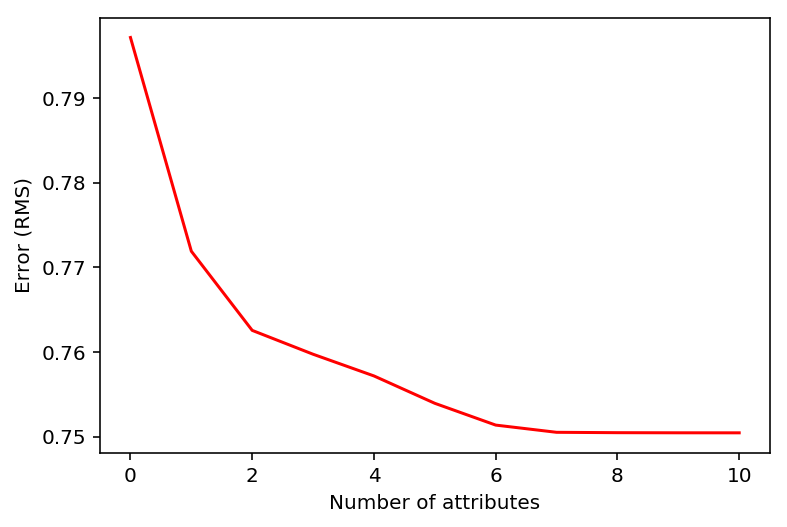

In [23]:
plot(range(len(features)), feature_error, 'r-', label = 'Datos')

xlabel('Number of attributes')
ylabel('Error (RMS)')

### Lasso Regression 

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.1)
lasso.fit(x, y)

print(lasso.coef_)

[-0.         -0.          0.          0.00702328 -0.          0.00808195
 -0.0027108  -0.          0.          0.          0.24638052]
